In [63]:
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt 
from pymatgen.ext.matproj import MPRester 
import numpy as np

with MPRester("CN7BQQV6jKvoIlVgU18a") as m:
    # Bandstructure for material id
    bandstructure = m.get_bandstructure_by_material_id("mp-7173")
    


In [64]:
#Bande interdite

gap = bandstructure.get_band_gap()
if gap['direct'] == False : 
    print ("Bande interdite indirecte d'energie: "+str(gap['energy'])+ " eV" + "\n" + "Transition de la bande interdite: " + str(gap['transition']))
else :
    print ("Bande interdite directe d'energie: "+str(gap['energy'])+ " eV" + "\n" + "Transition de la bande interdite: " + str(gap['transition']))

Bande interdite indirecte d'energie: 0.6432000000000002 eV
Transition de la bande interdite: \Gamma-X


In [68]:
#On détermine la dernière bande de valence et la première bande de conduction

print("Bande(s) de valence de plus haute énergie: ", bandstructure.get_vbm()['band_index'],'\n')
print("Bande(s) de conduction de plus basse énergie: ", bandstructure.get_cbm()['band_index'],'\n')
print("La dernière bande de valence est donc la 12 et la première bande de conduction la 13")

Bande(s) de valence de plus haute énergie:  defaultdict(<class 'list'>, {<Spin.up: 1>: [10, 11, 12]}) 

Bande(s) de conduction de plus basse énergie:  defaultdict(<class 'list'>, {<Spin.up: 1>: [13]}) 

La dernière bande de valence est donc la 12 et la première bande de conduction la 13


Pour la bande de valence, la plus grande dispersion se trouve sur le chemin 0 et la plus petite dispersion sur le chemin 2

Pour la bande de conduction, la plus grande dispersion se trouve sur le chemin 1 et la plus petite dispersion sur le chemin 0


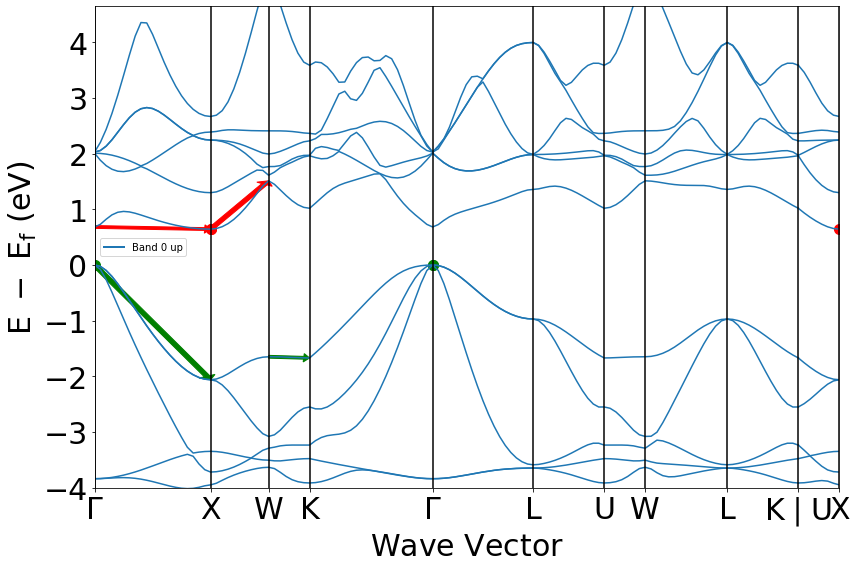

In [66]:
#Dispersions

bsplotter = BSPlotter(bandstructure)
data = bsplotter.bs_plot_data()

distances = data['distances']
energies = data['energy']

dispersionsVal = [] 
dispersionsCond = []

for i in range(len(distances)):
    dispersionsVal.append(abs((energies['1'][i][12][0] - energies['1'][i][12][-1])/(distances[i][-1]-distances[i][0])))
    dispersionsCond.append(abs((energies['1'][i][13][0] - energies['1'][i][13][-1])/(distances[i][-1]-distances[i][0])))

    
max1= list(dispersionsVal).index(max(dispersionsVal))
min1 = list(dispersionsVal).index(min(dispersionsVal))
max2 = list(dispersionsCond).index(max(dispersionsCond))
min2 = list(dispersionsCond).index(min(dispersionsCond))

#Affichage des flêches

print("Pour la bande de valence, la plus grande dispersion se trouve sur le chemin " +str(max1) +" et la plus petite dispersion sur le chemin "+str(min1) + "\n")
print("Pour la bande de conduction, la plus grande dispersion se trouve sur le chemin " +str(max2) +" et la plus petite dispersion sur le chemin " +str(min2))

bsplotter.get_plot(vbm_cbm_marker=True)
plt.arrow(distances[min1][0],energies['1'][min1][12][0],distances[min1][-1]-distances[min1][0], energies['1'][min1][12][-1]-energies['1'][min1][12][0],width = 0.05, length_includes_head = True,head_length=0.05, color = "green")
plt.arrow(distances[max1][0],energies['1'][max1][12][0],distances[max1][-1]-distances[max1][0], energies['1'][max1][12][-1]-energies['1'][max1][12][0],width = 0.05, length_includes_head = True,head_length=0.07, color = "green")
plt.arrow(distances[min2][0],energies['1'][min2][13][0],distances[min2][-1]-distances[min2][0], energies['1'][min2][13][-1]-energies['1'][min2][13][0],width = 0.05, length_includes_head = True,head_length=0.05, color = "red")
plt.arrow(distances[max2][0],energies['1'][max2][13][0],distances[max2][-1]-distances[max2][0], energies['1'][max2][13][-1]-energies['1'][max2][13][0],width = 0.05, length_includes_head = True,head_length=0.07, color = "red")
plt.show()


La masse effective au sommet de la dernière bande de valence vaut:  -6.119271072374986e-31  [kg]

La masse effective à la base de la première bande de conduction vaut:  5.8302301563314826e-31  [kg]


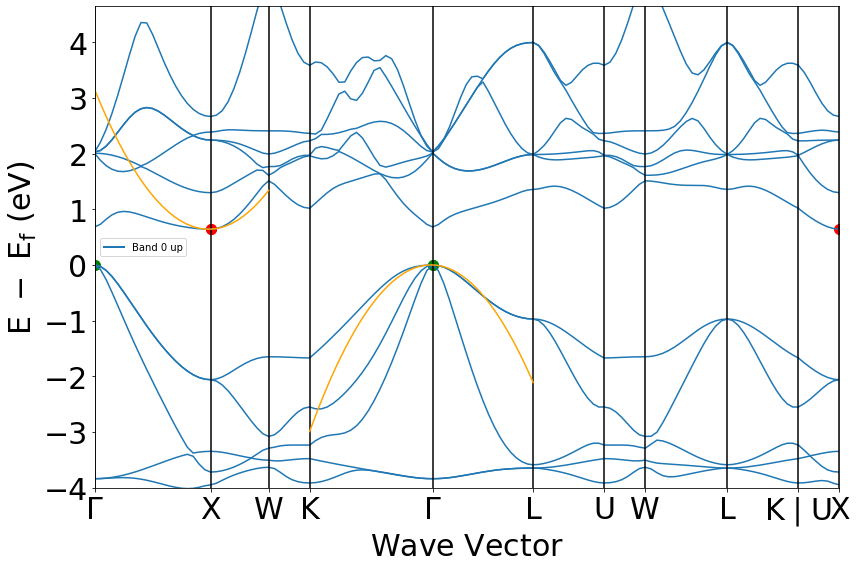

In [67]:
#Calcul de la masse effective par interpolation

bsplotter.get_plot(vbm_cbm_marker=True)

#Constante de Planck
h = (6.62607*10**(-34))/(2*np.pi*1.6021766*10**(-19))

#Au sommet de la dernière bande de valence
vbm = data.get('vbm')
x_vbm = [distances[3][20], vbm[1][0], distances[4][1]]
y_vbm = [energies['1'][3][12][20], vbm[1][1], energies['1'][4][12][1]]
interpol_vbm = np.polyfit(x_vbm,y_vbm,2)
intervalle_vbm = np.linspace(distances[3][0],distances[4][-1],500)
m_vbm = (h**2)*1/2*interpol_vbm[0]
print("La masse effective au sommet de la dernière bande de valence vaut: ", m_vbm, " [kg]\n")


#A la base de la première bande de conduction
cbm = data.get('cbm')
x_cbm = [distances[0][19], cbm[0][0], distances[1][1]]
y_cbm = [energies['1'][0][13][19], cbm[0][1], energies['1'][1][13][1]]
interpol_cbm = np.polyfit(x_cbm,y_cbm,2)
intervalle_cbm = np.linspace(distances[0][0],distances[1][-1],500)
m_cbm = (h**2)*1/2*interpol_cbm[0]
print("La masse effective à la base de la première bande de conduction vaut: ", m_cbm, " [kg]")

#Affichage des interpolations
plt.plot(intervalle_cbm,np.polyval(interpol_cbm,intervalle_cbm),"orange")
plt.plot(intervalle_vbm,np.polyval(interpol_vbm,intervalle_vbm),"orange")